In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import sample, shuffle
from sklearn import preprocessing
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import layers, models, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
# Load Fasion MNIST dataset 
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [27]:
# The pixel values normalization for the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [28]:
# Split the train dataset into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    training_images,
    training_labels,
    test_size=0.1,
    random_state=42,
    stratify=training_labels)    # keep class proportions (classification)

In [36]:
inputs = layers.Input(shape=(28, 28))
flatten = layers.Flatten()(inputs)
x = layers.Dense(128, activation="relu")(flatten)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

early_stop = EarlyStopping(
    monitor="val_loss",       # what to monitor
    patience=3,               # epochs to wait without improvement
    restore_best_weights=True)# roll back to best epoch

checkpoint = ModelCheckpoint(
    filepath="best_model.keras",
    monitor="val_loss",
    save_best_only=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=2)

Epoch 1/100
422/422 - 5s - loss: 0.5631 - accuracy: 0.8040 - val_loss: 0.3997 - val_accuracy: 0.8587 - 5s/epoch - 11ms/step
Epoch 2/100
422/422 - 2s - loss: 0.3958 - accuracy: 0.8600 - val_loss: 0.3706 - val_accuracy: 0.8648 - 2s/epoch - 6ms/step
Epoch 3/100
422/422 - 2s - loss: 0.3559 - accuracy: 0.8711 - val_loss: 0.3624 - val_accuracy: 0.8657 - 2s/epoch - 5ms/step
Epoch 4/100
422/422 - 3s - loss: 0.3278 - accuracy: 0.8804 - val_loss: 0.3446 - val_accuracy: 0.8743 - 3s/epoch - 7ms/step
Epoch 5/100
422/422 - 2s - loss: 0.3092 - accuracy: 0.8859 - val_loss: 0.3131 - val_accuracy: 0.8855 - 2s/epoch - 5ms/step
Epoch 6/100
422/422 - 3s - loss: 0.2954 - accuracy: 0.8913 - val_loss: 0.3101 - val_accuracy: 0.8898 - 3s/epoch - 6ms/step
Epoch 7/100
422/422 - 2s - loss: 0.2821 - accuracy: 0.8951 - val_loss: 0.3135 - val_accuracy: 0.8853 - 2s/epoch - 6ms/step
Epoch 8/100
422/422 - 3s - loss: 0.2727 - accuracy: 0.8991 - val_loss: 0.3029 - val_accuracy: 0.8900 - 3s/epoch - 7ms/step
Epoch 9/100
422

In [34]:
def plot_history(history):
    """
    Plots the training and validation loss and accuracy from a Keras history object.

    Args:
        history (dict): The history.history dictionary returned by model.fit().
    """

    # Determine which keys to use for loss and accuracy
    # Keras uses 'accuracy'/'val_accuracy' or 'acc'/'val_acc'
    if 'accuracy' in history:
        acc_key = 'accuracy'
        val_acc_key = 'val_accuracy'
    elif 'acc' in history:
        acc_key = 'acc'
        val_acc_key = 'val_acc'
    else:
        print("Could not find accuracy/acc keys in history.")
        return

    # Get the number of epochs
    epochs = range(1, len(history['loss']) + 1)
    
    # 1. Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 2. Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history[acc_key], 'b', label='Training Accuracy')
    plt.plot(epochs, history[val_acc_key], 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout() # Adjusts plot to prevent overlap
    plt.show()

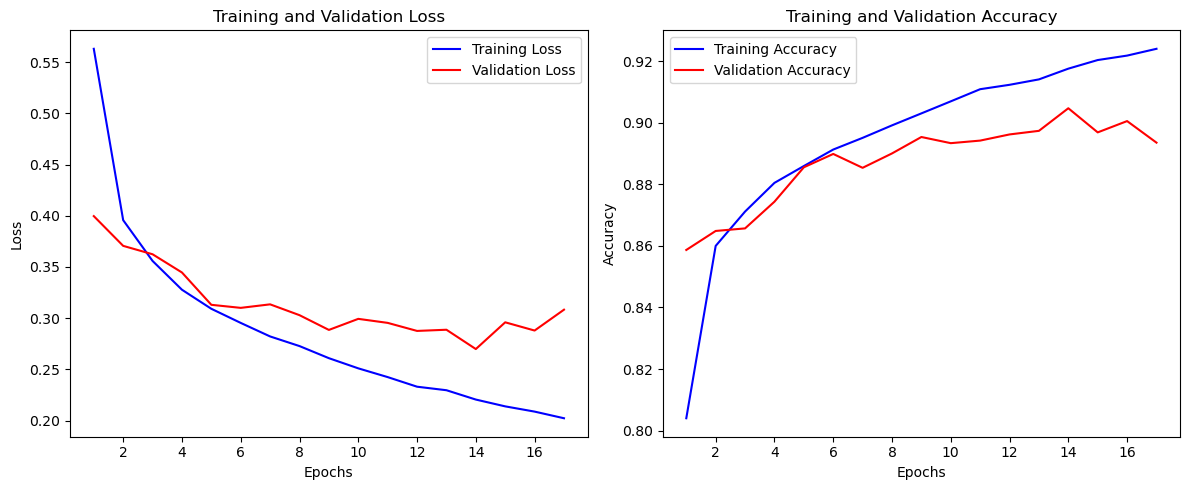

In [37]:
plot_history(history.history)

In [39]:
predicted_labels = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [48]:
accuracy = accuracy_score(test_labels, np.argmax(predicted_labels, axis=1))

In [49]:
print("Accuracy:", accuracy)

Accuracy: 0.8936
